In [1]:
import random as rand
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

1.1 One-max problem
===========

In [122]:

def generatePopulation():
    #Generate random population
    pop = []
    length = 30
    #popSize = rand.randint(50, 100)
    popSize = 100
    for i in range(popSize):
        randPop = ""
        for j in range(length):
            randPop = randPop+str(rand.randint(0,1))
        pop.append(randPop)
    return pop

def fitnessCalculation(individual):
    #Calculate fitness for individual
    fitness = 0
    for i in range(len(individual)):
        if(individual[i] == "1"):
            fitness += 1
    return fitness

def averageFitness(population):
    #Calculate average fitness for population
    fitness = []
    for i in range(len(population)):
        fitness.append(fitnessCalculation(population[i]))
    average = sum(fitness)/len(population)
    return average

def nFittestIndividuals(n, population):
    #Select n fittest individuals from population
    fittestIndividuals = []
    string = []
    fitness = []
    for i in population:
        string.append(i)
        fitness.append(fitnessCalculation(i))
    number = 0
    while(number != n):
        tempMax = 0
        tempIndex = 0
        for i in range(len(string)):
            if(fitness[i] > tempMax):
                tempMax = fitness[i]
                tempIndex = i
        fittestIndividuals.append(string[tempIndex])
        del string[tempIndex]
        del fitness[tempIndex]
        number += 1
    
    return fittestIndividuals

def checkForTarget(target, population):
    #Check if target string is in population
    for i in range(len(population)):
        if( population[i] == target):
            return True
    return False
        

def mutation(string):
    #Perform standard mutation on individual
    flip = rand.randint(0, 29)
    if(string[flip] == "1"):
        string = string[:flip] + "0" + string[flip + 1:]
    else:
        string = string[:flip] + "1" + string[flip + 1:]
    return string

def crossover(string_1, string_2):
    #Perform one-point crossover using two individuals
    crossoverString = ""
    crossoverPoint = rand.randint(0, len(string_1)-1)
    crossoverString_1 = string_1[:crossoverPoint] + string_2[crossoverPoint:]
    crossoverString_2 = string_2[:crossoverPoint] + string_1[crossoverPoint:]
    return [crossoverString_1, crossoverString_2]



def plotGenerations(data):
    figure(figsize=(12,6), dpi=80)
    plt.plot(range(0,len(data)), data)
    plt.title("Average Fitness Vs Generations")
    plt.xlabel("Generations")
    plt.ylabel("Average Fitness")
    plt.grid()
    plt.show()



In [135]:

def GA(target, generations, maxFitness):
    #Generate initial random population
    population = generatePopulation()
    origionalPopulation = population
    averageFitnessCurrent = averageFitness(population)
    fitnessData = []
    fitnessData.append(averageFitnessCurrent)
    generation = 0

    crossoverRate = 0.8
    mutationRate = 0.01

    numberOfCrossovers = int(len(population)*crossoverRate)
    numberOfMutations = int(len(population)*mutationRate)
    #Run for n generations
    while(generation < generations):
        #Create a new population
        generation += 1
        newPopulation = []
        fittestIndividuals = nFittestIndividuals(10, population)

        #Preform crossovers on top 15 individuals
        for i in range(int(numberOfCrossovers/2)):
            newIndividuals = crossover(fittestIndividuals[rand.randint(0, len(fittestIndividuals)-1)], fittestIndividuals[rand.randint(0, len(fittestIndividuals)-1)])
            newPopulation.append(newIndividuals[0])
            newPopulation.append(newIndividuals[1])

        #Carry over 20 of the fittest individuals from last population
        for i in range((len(population)-numberOfCrossovers)//10):
            newPopulation.extend(fittestIndividuals)
        
        #Preform mutations on new population
        for i in range(numberOfMutations):
            n1 =  rand.randint(0, len(population)-1)
            population[n1] = mutation(population[n1])

        population = newPopulation
        fitnessData.append(averageFitness(population))
        #If average fitness has stagnated, increase mutations by 1 and replace all but 1 of the individulas with the origionals
        #as the function is stuck in an non optimal solution
        if((len(fitnessData) > 10) and (fitnessData[-1] == fitnessData[-5]) and (fitnessData[-1] != maxFitness)):
            numberOfMutations += 1
            for i in range(len(population)-1):
                population[i] = origionalPopulation[i]
        
    return fitnessData

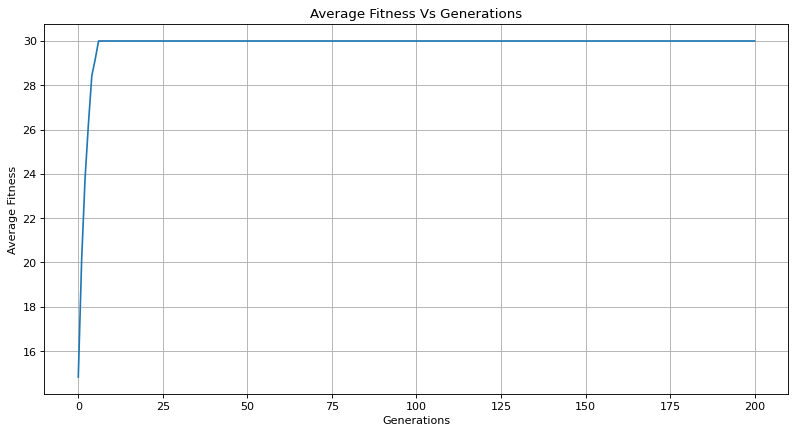

In [139]:
plotGenerations(GA("111111111111111111111111111111", 200, 30))

1.2 Evolving to a target string
===================

In [92]:


def fitnessCalculation(individual):
    target = "011100011010110110000101100011"
    fitness = 0
    for i in range(len(individual)):
        if(individual[i] == target[i]):
            fitness += 1
    return fitness
    

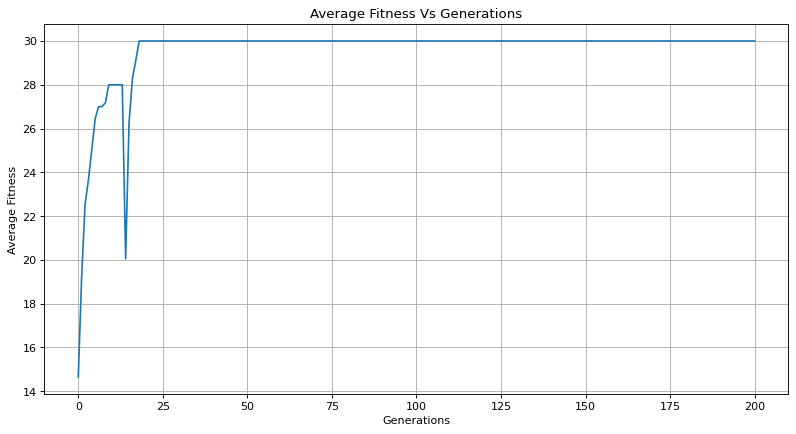

In [111]:
plotGenerations(GA("011100011010110110000101100011", 200, 30))

1.3 Deceptive landscapes
==================

In [112]:
def fitnessCalculation(individual):
    #Calculate fitness for individual
    fitness = 0
    numberOfZeros = 0
    for i in range(len(individual)):
        if(individual[i] == "1"):
            fitness += 1
        if(individual[i] == "0"):
            numberOfZeros += 1
    if(numberOfZeros == len(individual)):
        return numberOfZeros*2
    return fitness

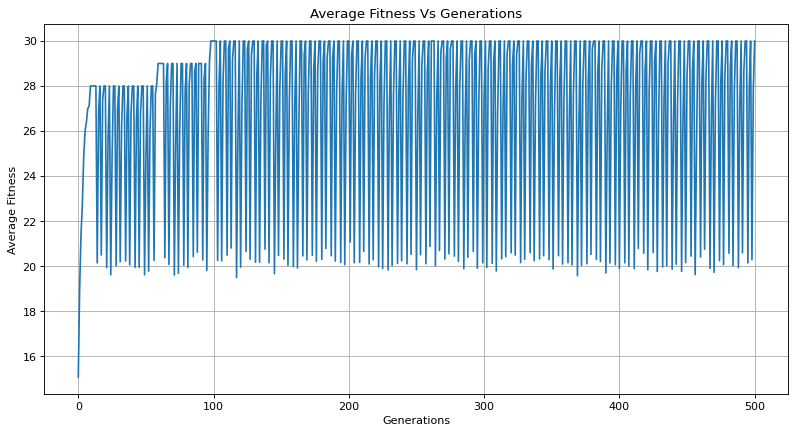

In [113]:
plotGenerations(GA("000000000000000000000000000000", 500, 60))

2 Bin-packing problem
=================

In [8]:
problem1 = {200: 3, 199: 1, 198: 2, 197: 2, 194: 2, 193: 1, 192: 1, 191: 3, 190: 2, 189: 1, 188: 2, 187: 2, 186: 1, 185: 4,
            184: 3, 183: 3, 182: 3, 181: 2, 180: 1, 179: 4, 178: 1, 177: 4, 175: 1, 174: 1, 173: 2, 172: 1, 171: 3, 170: 2,
            169: 3, 167: 2, 165: 2, 164: 1, 163: 4, 162: 1, 161: 1, 160: 2, 159: 1, 158: 3, 157: 1, 156: 6, 155: 3, 154: 2,
            153: 1, 152: 3, 151: 2, 150: 4
}
problem2 = {200: 2, 199: 4, 198: 1, 197: 1, 196: 2, 195: 2, 194: 2, 193: 1, 191: 2, 190: 1, 189: 2, 188: 1, 187: 2, 186: 1, 185: 2, 184: 5,
            183: 1, 182: 1, 181: 3, 180: 2, 179: 2, 178: 1, 176: 1, 175: 2, 174: 5, 173: 1, 172: 3, 171: 1, 170: 4, 169: 2, 168: 1, 167: 5,
            165: 2, 164: 2, 163: 3, 162: 2, 160: 2, 159: 2, 158: 2, 157: 4, 156: 3, 155: 2, 154: 1, 153: 3, 152: 2, 151: 2, 150: 2
}
problem3 = {200: 1, 199: 2, 197: 2, 196: 2, 193: 3, 192: 2, 191: 2, 190: 2, 189: 3, 188: 1, 187: 1, 185: 3, 183: 2, 182: 1, 181: 3, 180: 3,
            179: 3, 178: 1, 177: 5, 176: 2, 175: 5, 174: 4, 173: 1, 171: 3, 170: 1, 169: 2, 168: 5, 167: 1, 166: 4, 165: 2, 163: 1, 162: 2,
            161: 2, 160: 3, 159: 2, 158: 2, 157: 1, 156: 3, 155: 3, 154: 1, 153: 2, 152: 3, 151: 2, 150: 1
}
problem4 = {200: 3, 199: 5, 198: 4, 197: 1, 195: 1, 193: 4, 192: 1, 188: 1, 187: 1, 186: 3, 185: 3, 184: 2, 183: 2, 182: 1,
            181: 1, 180: 3, 179: 2, 178: 6, 177: 2, 176: 4, 175: 1, 173: 4, 172: 4, 170: 1, 169: 3, 168: 4, 167: 1, 165: 3,
            164: 1, 163: 2, 162: 4, 161: 1, 160: 3, 159: 3, 158: 1, 157: 3, 155: 2, 154: 3, 153: 1, 152: 3, 151: 1, 150: 1
}
problem5 = {200: 5, 199: 2, 198: 2, 197: 2, 196: 1, 195: 3, 194: 2, 193: 2, 192: 4, 191: 2, 190: 4, 188: 3, 187: 2, 186: 2, 185: 1, 184: 1,
            183: 1, 182: 1, 181: 3, 180: 1, 178: 3, 177: 2, 176: 2, 174: 1, 173: 1, 172: 1, 171: 3, 168: 2, 167: 1, 165: 1, 164: 1, 163: 1,
            162: 3, 161: 3, 160: 3, 159: 2, 158: 3, 157: 3, 156: 2, 155: 5, 154: 3, 153: 3, 151: 5, 150: 2
}

In [309]:


def generateListOfItems(problem):
    #Create a list where every element is an item with the weight being stored
    listOfItems = []
    for i in problem.keys():
        for j in range(int(problem[i])):
            listOfItems.append(int(i))
    return listOfItems

def generatePopulation(listOfItems):
    #Generate random population
    popSize = 200
    population = []
    for j in range(popSize):
        chromosome = []
        for i in range(len(listOfItems)):
            chromosome.append(rand.randint(1, len(listOfItems)))
        population.append(chromosome)
    return population

def fitnessCalculation(individual):
    #Fitness is the number of items - the number of bins used   
    numberOfBins = len(set(individual))
    minFitness = len(individual)
    fitness = minFitness-numberOfBins
    return fitness

def searchList(lst, find):
    #Find indexes of an element in a list
    indexes = []
    for i in range(len(lst)):
        if(lst[i] == find):
            indexes.append(i)
    return indexes

def solutionValidator(individual, listOfItems):
    #Returns true if all bins are not exceeding capacity
    keys = set(individual)
    for i in set(individual):
        indexes = searchList(individual, i)
        binCapacity = 0
        for j in indexes:
            binCapacity += listOfItems[j]
        if(binCapacity > 1000):
            return False
    return True

def mutation(chromosome, n, listOfItems):
    #Preform mutation on list while checking the new solution is valid
    valid = False
    while(valid == False):
        chromosome[rand.randint(0, len(chromosome)-1)] = rand.randint(1,n)
        if((solutionValidator(chromosome, listOfItems) == True)):
            valid = True
    return chromosome

def crossover(parent1, parent2, listOfItems):
    #Preform crossover and verift that the 2 children are valid soulutions
    valid = False
    maxIterations = 0
    while((valid == False) or maxIterations > 100):
        crossoverPoint = rand.randint(0, len(parent1)-1)
        child1 = parent1[:crossoverPoint] + parent2[crossoverPoint:]
        child2 = parent2[:crossoverPoint] + parent1[crossoverPoint:]
        if((solutionValidator(child1, listOfItems) == True) and (solutionValidator(child2, listOfItems) == True)):
            valid = True
        maxIterations += 1
        if(maxIterations == 100):
            return parent1, parent2

    return child1, child2

def getMinNumberOfBins(population):
    #Find the minimum number of bins for the whole population
    minimum = 1000
    for i in population:
        if(len(set(i)) < minimum):
            minimum = len(set(i))
    return minimum

In [316]:
def GA(problem):
   #Create list of item weights and initial population
    listOfItems = generateListOfItems(problem)
    population = generatePopulation(listOfItems)
    initialPopulation = population
    fitnessData = []
    currentMinBins = 100
    timeSineMinChaged = 0
 
    
    fitnessData.append([averageFitness(population), getMinNumberOfBins(population)])

    numOfCrossovers = int(0.8*len(population))
    numOfMutations = int(0.01*len(population))

    #While the minumum number of bins has not changed for 300 generations
    while(timeSineMinChaged < 500):
        #create new population and find 10 fittest individuals
        newPopulation = []
        fittestIndividuals = nFittestIndividuals(50, population)

        #Preform 40 crossovers on top 10 of the population
        for i in range(numOfCrossovers//2):
            newIndividuals = crossover(fittestIndividuals[rand.randint(0, len(fittestIndividuals)-1)], fittestIndividuals[rand.randint(0, len(fittestIndividuals)-1)],
                                       listOfItems)
            newPopulation.append(newIndividuals[0])
            newPopulation.append(newIndividuals[1])

        #Cary over fittest individuals from last population
        for i in range((len(population) - len(newPopulation))//20):
            newPopulation.extend(fittestIndividuals[:20])

        
        #Preform mutations
        for i in range(numOfMutations):
            num = rand.randint(0, len(listOfItems)-1)
            newPopulation[num] = mutation(newPopulation[num], len(listOfItems), listOfItems)

        #if the min number of bins has not changed for 10 generations increase mutaions
        if(timeSineMinChaged > 50):
            numOfMutations += 1
            for i in range(len(population)-20):
                population[i] = initialPopulation[i]

        population = newPopulation
        fitnessData.append([averageFitness(population), getMinNumberOfBins(population)])

        #keep track of time since min number of bins changed from generation to generation
        if(getMinNumberOfBins(population) < currentMinBins):
            currentMinBins = getMinNumberOfBins(population)
            timeSineMinChaged = 0
        else:
            timeSineMinChaged += 1
            
    return fitnessData

In [317]:
solution = GA(problem1)
print("Minimum number of bins found = ",solution[-1][1])

Minimum number of bins found =  22


In [318]:
solution = GA(problem2)
print("Minimum number of bins found = ",solution[-1][1])

Minimum number of bins found =  22


In [319]:
solution = GA(problem3)
print("Minimum number of bins found = ",solution[-1][1])

Minimum number of bins found =  22


In [320]:
solution = GA(problem4)
print("Minimum number of bins found = ",solution[-1][1])

Minimum number of bins found =  23


In [321]:
solution = GA(problem5)
print("Minimum number of bins found = ",solution[-1][1])

Minimum number of bins found =  22
